# Inter-means algorithm from scratch

The Inter-Means Algorithm is an iterative image processing technique used to determine an optimal threshold for image segmentation. The process involves the following steps:

1. Initial Threshold Estimation: Begin by selecting an initial threshold value, denoted as 𝑇. A good starting point is the average intensity of the entire image.

2. Image Partitioning: The image is divided into two groups, 𝑅1 and 𝑅2, using the initial threshold 𝑇. Pixels in 𝑅1 have intensities less than or equal to 𝑇, while those in 𝑅2 have intensities greater than 𝑇.

3. Calculate Mean Values: Calculate the mean grey values, 𝜇1 and 𝜇2, for the respective partitions 𝑅1 and 𝑅2.

4. Threshold Adjustment: Update the threshold, 𝑇, as the average of 𝜇1 and 𝜇2 divided by 2: 𝑇 = (𝜇1 + 𝜇2) / 2.

5. Iterative Refinement: Repeat steps 2 to 4 until 𝜇1 and 𝜇2 do not significantly change in successive iterations. This ensures that the threshold converges to a stable value.

The Inter-Means Algorithm helps to automatically find a threshold that separates an image into meaningful segments, making it a useful tool in image processing and computer vision tasks.

In [249]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Function to convert an RGB image to grayscale

In [250]:
def rgb_to_gray(image):
    """
    Convert an RGB image to grayscale using a weighted sum of the color channels.
    
    Args:
        image (numpy.ndarray): Input RGB image.

    Returns:
        numpy.ndarray: Grayscale image.
    """
    return np.dot(image, [0.2989, 0.5870, 0.1140]).astype(np.uint8)

## Function to apply the Inter-Means algorithm for thresholding

In [251]:
def inter_means_threshold(image, initial_threshold=None, epsilon=1e-5):
    """
    Apply the Inter-Means algorithm to find an optimal threshold for image segmentation.

    Args:
        image (numpy.ndarray): Input image.
        initial_threshold (float): Initial estimate of the threshold (default: None, which uses the mean of the image).
        epsilon (float): Convergence criteria for the thresholding algorithm.

    Returns:
        float: Calculated threshold value.
    """
    image_gray = rgb_to_gray(image) 

    if initial_threshold is None:
        threshold = np.mean(image_gray)
    else:
        threshold = initial_threshold

    prev_mu1 = 0
    prev_mu2 = 0

    while True:
        region1 = image_gray[image_gray <= threshold]
        region2 = image_gray[image_gray > threshold]
        
        mean1 = np.mean(region1)
        mean2 = np.mean(region2)
        
        new_threshold = 0.5 * (mean1 + mean2)
        
        if abs(mean1 - prev_mu1) < epsilon and abs(mean2 - prev_mu2) < epsilon:
            break
        
        threshold = new_threshold
        prev_mu1 = mean1
        prev_mu2 = mean2

    return threshold


## Function to segment the image using the calculated threshold

In [252]:
def segment_image(image, threshold):
    """
    Segment an image based on a given threshold value.

    Args:
        image (numpy.ndarray): Input image.
        threshold (float): Threshold value for segmentation.

    Returns:
        numpy.ndarray: Segmented image.
    """
    image_gray = rgb_to_gray(image)
    segmented_image = (image_gray > threshold).astype(np.uint8) * 255
    return segmented_image

## Load and display the original images

In [253]:
image1_name = 'Eiffel_Tower.jpg'
image2_name = 'people.jpg'

In [254]:
image1 = cv2.imread(image1_name,cv2.IMREAD_COLOR)
image2 = cv2.imread(image2_name)

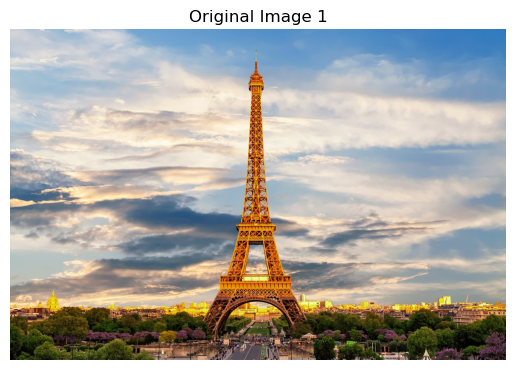

In [255]:
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(image1_rgb)
plt.title("Original Image 1")
plt.axis('off')
plt.show()

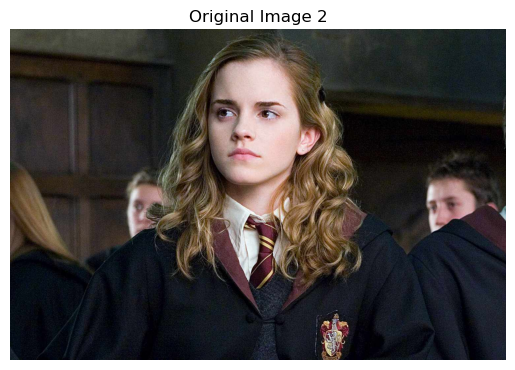

In [256]:
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
plt.imshow(image2_rgb)
plt.title("Original Image 2")
plt.axis('off')
plt.show()

## Calculate and display thresholds

In [257]:
threshold1 = inter_means_threshold(image1_rgb)
threshold2 = inter_means_threshold(image2_rgb)

## Segment the images

In [258]:
segmented_image1 = segment_image(image1_rgb, threshold1)
segmented_image2 = segment_image(image2_rgb, threshold2)

## Display the original and segmented images

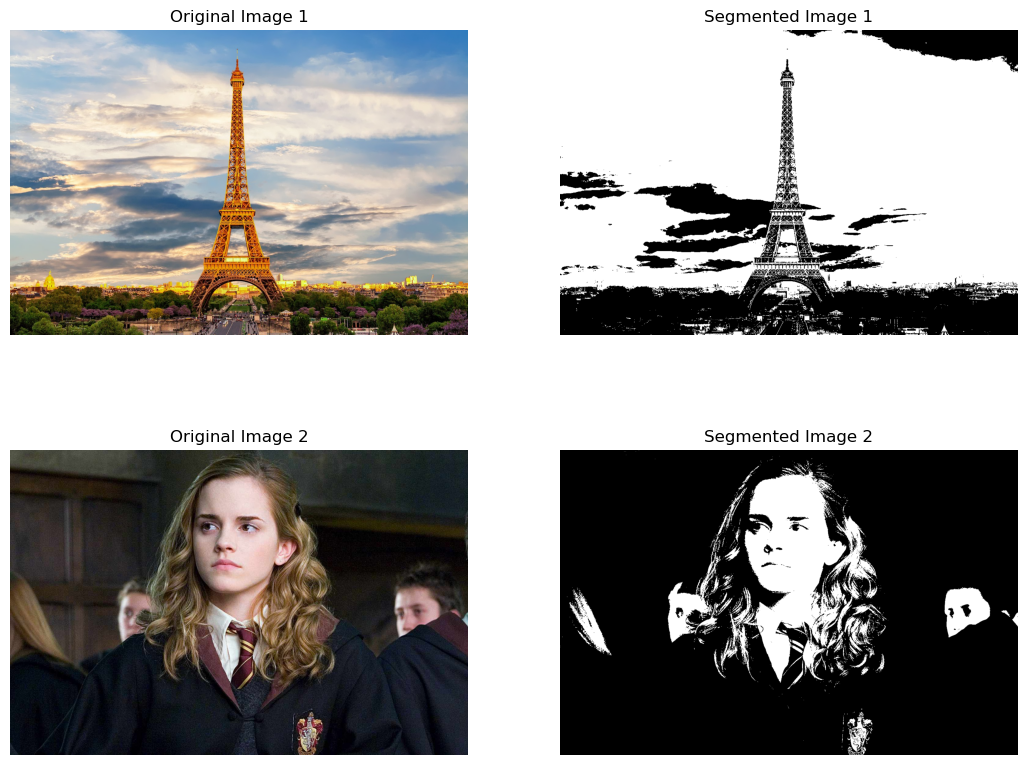

In [259]:
plt.figure(figsize=(13, 10))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image 1')

plt.subplot(2, 2, 2)
plt.imshow(segmented_image1, cmap='gray')
plt.axis('off')
plt.title('Segmented Image 1')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image 2')

plt.subplot(2, 2, 4)
plt.imshow(segmented_image2, cmap='gray')
plt.axis('off')
plt.title('Segmented Image 2')

plt.show()

In [260]:
print(f"Threshold for image 1: {threshold1}")
print(f"Threshold for image 2: {threshold2}")

Threshold for image 1: 133.36356282538105
Threshold for image 2: 95.99036629385708


## Save images

In [261]:
cv2.imwrite(f'segmented_{image1_name}', segmented_image1)
cv2.imwrite(f'segmented_{image2_name}', segmented_image2)

True